<a href="https://colab.research.google.com/github/mohamedfadul/DeepSearch-Finding-Truncated-Differential-Trails-Using-Genetic-Algorithms-and-Deep-Learning/blob/main/Val_Perm5_R9_RF_US_DThresh_P2_GitHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [ ]:
!wget -O all_dataset_path.csv "https://drive.google.com/uc?export=download&id=1FKqNtEklKLTc6IuXLVjKtyD1_1YTFv5j"

--2024-11-01 09:57:02--  https://drive.google.com/uc?export=download&id=1FKqNtEklKLTc6IuXLVjKtyD1_1YTFv5j
Resolving drive.google.com (drive.google.com)... 108.177.121.102, 108.177.121.100, 108.177.121.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1FKqNtEklKLTc6IuXLVjKtyD1_1YTFv5j&export=download [following]
--2024-11-01 09:57:02--  https://drive.usercontent.google.com/download?id=1FKqNtEklKLTc6IuXLVjKtyD1_1YTFv5j&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207536 (203K) [application/octet-stream]
Saving to: ‘all_dataset_path.csv’

all_dataset_path.cs 100%[===================>] 202.67

In [ ]:
all_dataset =pd.read_csv ('all_dataset_path.csv')

In [ ]:
# Download the model from Google Drive using gdown
model_url = "https://drive.google.com/uc?export=download&id=1oO5a-X3vgcTH3UXQsLJ0JvXvCybyqhMn"  # Replace with your actual model file ID

model_path = "validity_phase1_1_undersample_rf_defaulthresh.pkl"
gdown.download(model_url, model_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1oO5a-X3vgcTH3UXQsLJ0JvXvCybyqhMn
To: /content/validity_phase1_1_undersample_rf_defaulthresh.pkl
100%|██████████| 4.23M/4.23M [00:00<00:00, 34.5MB/s]


'validity_phase1_1_undersample_rf_defaulthresh.pkl'

In [ ]:
import joblib

# Load scikit-learn model
loaded_model = joblib.load(model_path)
print("Scikit-learn model loaded successfully!")

Scikit-learn model loaded successfully!


In [ ]:
all_dataset['sboxes'] = ((all_dataset['sboxes']/(all_dataset['round']*8)))
all_dataset['round'] = (all_dataset['round'])/100

In [ ]:
# Take 50% sample for test data
dataset = all_dataset.sample(frac=0.50,random_state=0)
test_dataset = all_dataset.drop(dataset.index)

In [ ]:
test_labels = test_dataset.pop('validity')

In [ ]:
# Generate predictions
y_preds = loaded_model.predict(test_dataset)
y_preds = (y_preds > 0.5).astype(int)  # Binarize predictions

# Print classification report and confusion matrix
print("Classification Report: \n", classification_report(test_labels, y_preds))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_preds)
print("Confusion Matrix: \n", conf_matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       428
           1       0.90      0.97      0.93        59

    accuracy                           0.98       487
   macro avg       0.95      0.98      0.96       487
weighted avg       0.98      0.98      0.98       487

Confusion Matrix: 
 [[422   6]
 [  2  57]]


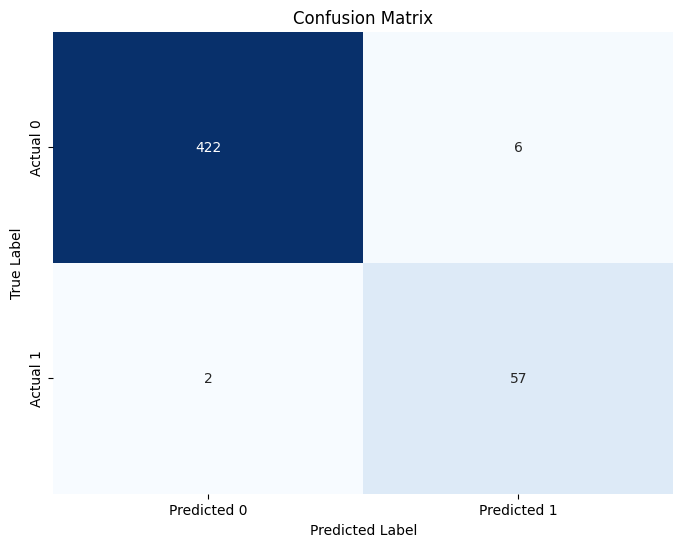

True Negatives (Class 0 predicted correctly): 422
False Positives (Class 0 incorrectly predicted as Class 1): 6
False Negatives (Class 1 incorrectly predicted as Class 0): 2
True Positives (Class 1 predicted correctly): 57


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_preds)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print details for each class
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives (Class 0 predicted correctly): {tn}")
print(f"False Positives (Class 0 incorrectly predicted as Class 1): {fp}")
print(f"False Negatives (Class 1 incorrectly predicted as Class 0): {fn}")
print(f"True Positives (Class 1 predicted correctly): {tp}")
